In [20]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
 
#Se importan los Datasets
df_denunciados = pd.read_csv('/workspaces/repos1/SEMANA_12/Denunciados.csv')
df_denunciantes = pd.read_csv('/workspaces/repos1/SEMANA_12/Denunciantes.csv')

#Se muestra el df1
df_denunciados.head(10)

,Nombres y apellidos,Sexo,Periodo
0,Mateo Salgado,Hombre,2022
1,Guillermo Mendoza,Hombre,2021
2,Leonardo Castro,Hombre,2020
3,Rodrigo Varela,Hombre,2021
4,Paloma Barajas,Mujer,2021
5,Alejandro Barajas,Hombre,2022
6,Kevin Chávez,Hombre,2021
7,Raúl Jiménez,Hombre,2021
8,Fernanda Sánchez,Mujer,2021
9,Renata Valverde,Mujer,2020


In [21]:
#Se muestra el df2
df_denunciantes.head(10)

,Nombres y apellidos,Sexo,Periodo
0,Martín García,Hombre,2022
1,Juan Rodríguez,Hombre,2021
2,Luis Hernández,Hombre,2020
3,Alejandro Pérez,Hombre,2022
4,Carlos Ramírez,Hombre,2021
5,Isidora León,Mujer,2021
6,Fernanda Pineda,Mujer,2020
7,Renata Peña,Mujer,2022
8,Alejandra Flores,Mujer,2021
9,Clara Herrera,Mujer,2020


<Axes: >

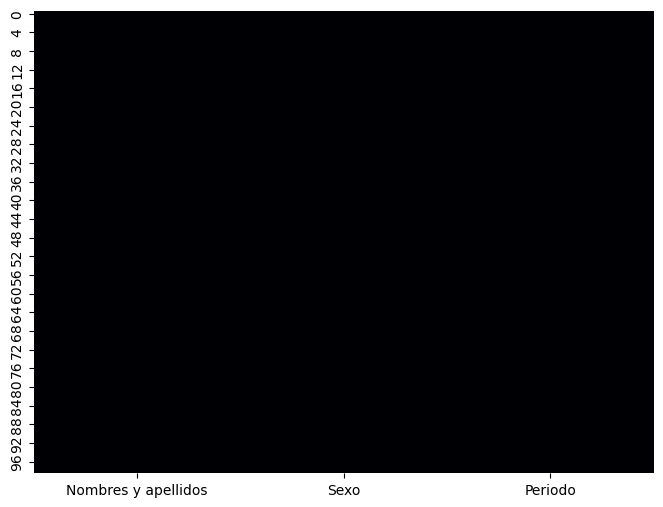

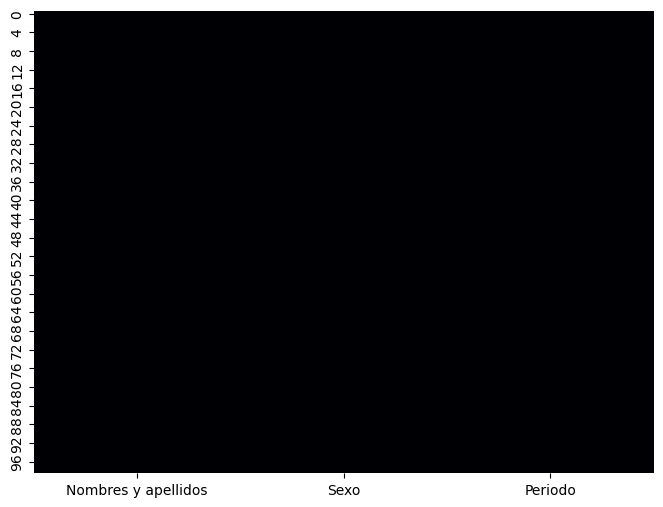

In [22]:
#Se crea el mapa de calor de datos atipicos
plt.figure(figsize = (8,6))
sb.heatmap(df_denunciados.isnull(), cbar=False , cmap = 'magma')

plt.figure(figsize = (8,6))
sb.heatmap(df_denunciantes.isnull(), cbar=False , cmap = 'magma')

In [25]:
#Se agrega columna "id" en ambos data frame, para realizar union entre ambos df
df_denunciantes['id'] = 1
df_denunciados['id'] = 0

In [26]:
df_denunciantes

,Nombres y apellidos,Sexo,Periodo,id
0,Martín García,Hombre,2022,1
1,Juan Rodríguez,Hombre,2021,1
2,Luis Hernández,Hombre,2020,1
3,Alejandro Pérez,Hombre,2022,1
4,Carlos Ramírez,Hombre,2021,1
...,...,...,...,...
94,Diego Herrera,Hombre,2021,1
95,Eva Salazar,Mujer,2020,1
96,Catalina Ibarra,Mujer,2022,1
97,Lourdes Ríos,Mujer,2021,1


In [27]:
df_denunciados

,Nombres y apellidos,Sexo,Periodo,id
0,Mateo Salgado,Hombre,2022,0
1,Guillermo Mendoza,Hombre,2021,0
2,Leonardo Castro,Hombre,2020,0
3,Rodrigo Varela,Hombre,2021,0
4,Paloma Barajas,Mujer,2021,0
...,...,...,...,...
94,Pablo Villegas,Hombre,2020,0
95,Gustavo Robles,Hombre,2022,0
96,Sebastián Lugo,Hombre,2022,0
97,Regina Ramírez,Mujer,2021,0


In [29]:
# Unir los dataframes usando concat
df_final = pd.concat([df_denunciantes, df_denunciados], ignore_index=True)
df_final

,Nombres y apellidos,Sexo,Periodo,id
0,Martín García,Hombre,2022,1
1,Juan Rodríguez,Hombre,2021,1
2,Luis Hernández,Hombre,2020,1
3,Alejandro Pérez,Hombre,2022,1
4,Carlos Ramírez,Hombre,2021,1
...,...,...,...,...
193,Pablo Villegas,Hombre,2020,0
194,Gustavo Robles,Hombre,2022,0
195,Sebastián Lugo,Hombre,2022,0
196,Regina Ramírez,Mujer,2021,0


In [32]:
# Ordenando segun una columna en especifico
df_final = df_final.sort_values(by='Periodo')
df_final

,Nombres y apellidos,Sexo,Periodo,id
98,Alma Valdez,Mujer,2020,1
159,Lucía Alvarado,Mujer,2020,0
115,Omar Montes,Hombre,2020,0
113,Julián Cordero,Hombre,2020,0
112,Tomás Gálvez,Hombre,2020,0
...,...,...,...,...
22,Raúl Aguilar,Hombre,2022,1
19,Lucía Jiménez,Mujer,2022,1
18,Daniela Sánchez,Mujer,2022,1
50,Alberto Vargas,Hombre,2022,1


In [35]:
# Se utiliza groupby para contar la cantidad de 1 y 0 por periodo
tabla_resumen = df_final.groupby(['Periodo', 'id']).size().unstack(fill_value=0)

# Cambiar el nombre de las columnas para mayor claridad
tabla_resumen.columns = ['Cantidad_0', 'Cantidad_1']

# Mostrar la tabla de resumen
tabla_resumen

,Cantidad_0,Cantidad_1
Periodo,,
2020,27,33
2021,46,33
2022,26,33


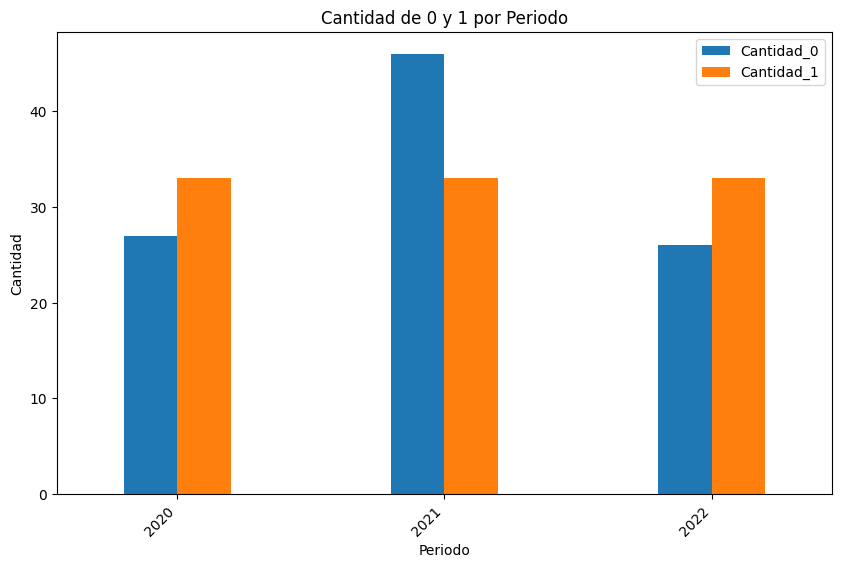

In [40]:
# Se genera un gráfico de barras agrupadas
tabla_resumen.plot(kind='bar', width=0.4, figsize=(10, 6))

# Añadir etiquetas y título
plt.xlabel('Periodo')
plt.ylabel('Cantidad')
plt.title('Cantidad de 0 y 1 por Periodo')

# Ajustar la posición de las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()